In [1]:
import os
import sys
sys.path.append('../')
from facerec.dataset_generator import DataGenerator
from facerec.siamese_models import get_siamese_model, train_model

In [2]:
IMGS_DIR = r'../data/faces/'
PAIRS_DIR = r'../data/pairs/'
TRAIN_POSITIVE_PAIRS_DIR = os.path.join(PAIRS_DIR, 'train_positive_pairs.csv')
TRAIN_NEGATIVE_PAIRS_DIR = os.path.join(PAIRS_DIR, 'train_negative_pairs.csv')

SEED = 80808
BATCH_SIZE = 32
INPUT_SHAPE = (150, 150, 3)

train_data = DataGenerator(
    positive_pairs_path=TRAIN_POSITIVE_PAIRS_DIR,
    negative_pairs_path=TRAIN_NEGATIVE_PAIRS_DIR,
    images_path=IMGS_DIR,
    input_shape=INPUT_SHAPE,
    batch_size=BATCH_SIZE,
    seed=SEED,
    shuffle=True,
    debug=True
)

VAL_POSITIVE_PAIRS_DIR = os.path.join(PAIRS_DIR, 'val_positive_pairs.csv')
VAL_NEGATIVE_PAIRS_DIR = os.path.join(PAIRS_DIR, 'val_negative_pairs.csv')

val_data = DataGenerator(
    positive_pairs_path=VAL_POSITIVE_PAIRS_DIR,
    negative_pairs_path=VAL_NEGATIVE_PAIRS_DIR,
    images_path=IMGS_DIR,
    input_shape=INPUT_SHAPE,
    batch_size=BATCH_SIZE,
    seed=SEED,
    shuffle=True,
    debug=True
)

TEST_POSITIVE_PAIRS_DIR = os.path.join(PAIRS_DIR, 'test_positive_pairs.csv')
TEST_NEGATIVE_PAIRS_DIR = os.path.join(PAIRS_DIR, 'test_negative_pairs.csv')

test_data = DataGenerator(
    positive_pairs_path=TEST_POSITIVE_PAIRS_DIR,
    negative_pairs_path=TEST_NEGATIVE_PAIRS_DIR,
    images_path=IMGS_DIR,
    input_shape=INPUT_SHAPE,
    batch_size=BATCH_SIZE,
    seed=SEED,
    shuffle=True,
    debug=True
)

print(f'Train data: {BATCH_SIZE * len(train_data)} samples in {len(train_data)} batches')
print(f'Validation data: {BATCH_SIZE * len(val_data)} samples in {len(val_data)} batches')
print(f'Test data: {BATCH_SIZE * len(test_data)} samples in {len(test_data)} batches')

Train data: 24128 samples in 754 batches
Validation data: 3040 samples in 95 batches
Test data: 3040 samples in 95 batches


In [3]:
siamese_model = get_siamese_model('VGG16', input_shape=INPUT_SHAPE)

history = train_model(
    siamese_network=siamese_model,
    model_name='VGG16-150-128',
    training_dataset_generator=train_data,
    validation_dataset_generator=val_data)

Model: "Pretrained_VGG16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 8192)              0         
                                                                 
 dense (Dense)               (None, 128)               1048704   
                                                                 
Total params: 15,763,392
Trainable params: 1,048,704
Non-trainable params: 14,714,688
_________________________________________________________________
Epoch 1/50
754/754 [==============================] - 275s 348ms/step - loss: 0.2614 - accuracy: 0.5330 - val_loss: 0.2518 - val_accuracy: 0.5526
Epoch 2/50
754/754 [==============================] - 260s 345ms/step - loss: 0.2465 - accuracy: 0.5659 - val_loss: 0.2438 - val_accuracy: 0.5809
Ep

In [4]:
siamese_model.evaluate(test_data)

95/95 [==============================] - 29s 298ms/step - loss: 0.2155 - accuracy: 0.6651


[0.21550995111465454, 0.6651315689086914]

In [6]:
import pandas as pd

hist_df = pd.DataFrame(history.history)

hist_csv_file = r'../logs/history_vgg_2009_150_128.csv'
with open(hist_csv_file, mode='w') as f:
    hist_df.to_csv(f)

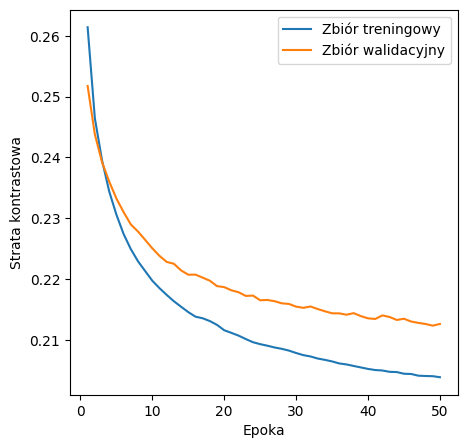

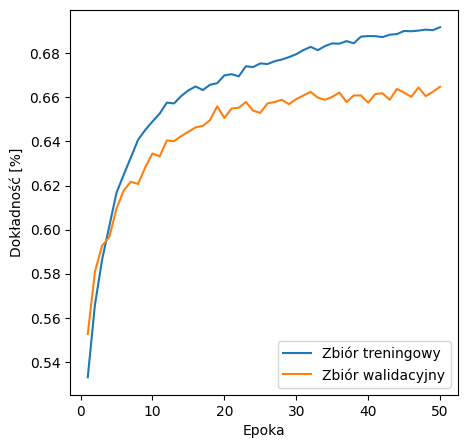

In [8]:
import matplotlib.pyplot as plt
import pandas as pd

history = pd.read_csv(r'../logs/history_vgg_2009_150_128.csv')

plt.figure(figsize=(5, 5))
# plt.ylim([0, 0.4])
# plt.xlim([0, 51])
plt.plot(range(1, 51), history['loss'], label='Zbiór treningowy')
plt.plot(range(1, 51), history['val_loss'], label='Zbiór walidacyjny')
# plt.grid()
plt.legend(loc='upper right')
# plt.title('Model loss')
plt.ylabel('Strata kontrastowa')
plt.xlabel('Epoka')
plt.show()

plt.figure(figsize=(5, 5))
# plt.ylim([0, 1])
# plt.xlim([0, 51])
plt.plot(range(1, 51), history['accuracy'], label='Zbiór treningowy')
plt.plot(range(1, 51), history['val_accuracy'], label='Zbiór walidacyjny')
# plt.grid()
plt.legend(loc='lower right')
# plt.title('Model accuracy')
plt.ylabel('Dokładność [%]')
plt.xlabel('Epoka')
plt.show()